In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784') # works in python 3.7 enviornment

In [2]:
#x=mnist.data()
#y=mnist.target()
x , y =mnist['data'] , mnist['target']

In [3]:
x.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
some_digit=x[0]
some_digit_pic=some_digit.reshape(28,28)

In [6]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

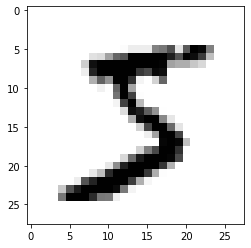

In [7]:
plt.imshow(some_digit_pic,cmap=matplotlib.cm.binary,interpolation='nearest') ## image

In [8]:
y[0]

'5'

In [9]:
y_train=y[:60000]
y_test=y[60000:]

In [10]:
x_train=x[:60000]
x_test=x[60000:]

In [11]:
import numpy as np
suffeled_index=np.random.permutation(60000) #a good practice to shuffle indexes

In [12]:
y_train = y_train[suffeled_index]

In [13]:
x_train = x_train[suffeled_index]

##   6 detector

In [14]:
y_train=y_train.astype(np.int8) #type casting str to int
y_test=y_test.astype(np.int8)

In [15]:
y_train_6= (y_train==6)
y_test_6= (y_test==6)

In [16]:
y_train_6

array([ True, False,  True, ..., False,  True, False])

In [17]:
y_test_6

array([False, False, False, ..., False, False,  True])

In [18]:
y_train_6.shape

(60000,)

In [19]:
y_test_6.shape

(10000,)

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(tol=0.1) # this tolerence is used to make execution fast only.

In [21]:
model.fit(x_train,y_train_6) 

C:\Users\rawat\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(tol=0.1)

In [26]:
model.predict([x_test[9999]])

array([ True])

In [27]:
im=x_test[9999].reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

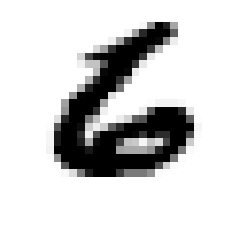

In [28]:
plt.imshow(im,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')

In [30]:
y_test_6[9999]

True

In [31]:
y_test[9999]

6

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,x_train,y_train_6,cv=3,scoring='accuracy')

C:\Users\rawat\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rawat\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

array([0.9835 , 0.9859 , 0.98395])

In [33]:
prediction = model.predict(x_test)


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test_6, prediction))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      9042
        True       0.93      0.92      0.92       958

    accuracy                           0.98     10000
   macro avg       0.96      0.95      0.96     10000
weighted avg       0.98      0.98      0.98     10000

